Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its
first 10 rows.

In [2]:
 from google.colab import files
 uploaded = files.upload()

Saving BIKE DETAILS (1).csv to BIKE DETAILS (1).csv


In [6]:
import pandas as pd
df = pd.read_csv("BIKE DETAILS (1).csv")
df.head(10)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


#Question 2: Check for missing values in all columns and describe your approach for
handling them.
(Include your Python code and output in the code box below.)

In [7]:
# check for missing values
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


Missing Values Analysis & Handling

The dataset was checked for missing values using:

df.isnull().sum()

df.info()


The results showed that the column ex_showroom_price contains missing values (435 entries).

Approach to Handle Missing Values

For numerical columns, missing values were replaced with the median, because median is robust against outliers.

For categorical columns, missing values were filled using the mode (most frequent value).


This ensures that we do not lose data by dropping rows and the dataset remains consistent for analysis.

#Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.


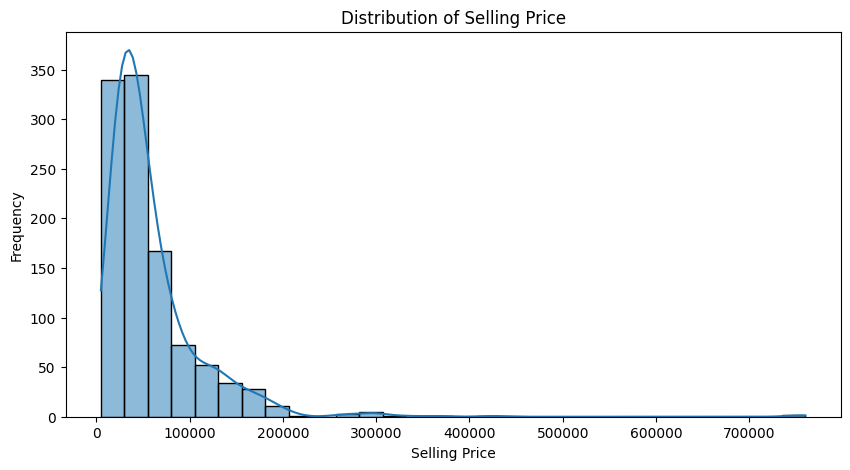

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df['selling_price'], bins=30, kde=True)

plt.title("Distribution of Selling Price")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.show()

The histogram shows that most selling price are concentrated in the lower range.
This indicates thar the majority of bikes are sold at lower to mid-range prices,
and very high-priced bikes are ;ess common.Thew distribution is right-skewed.
* Trend: Right-skewed, most bikes are low-priced

#Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.

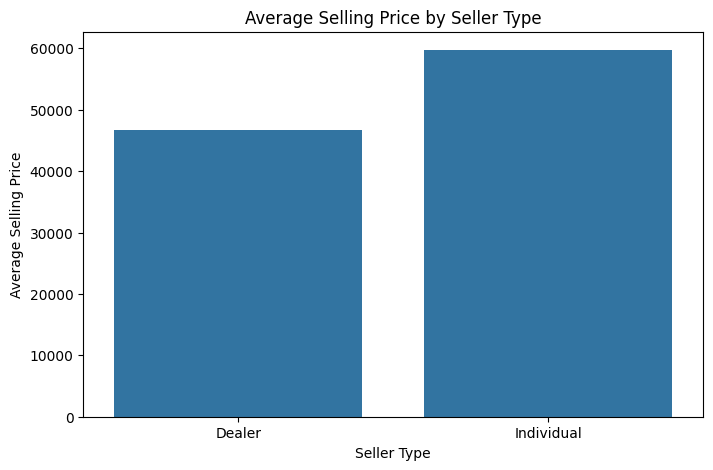

,seller_type,selling_price
0,Dealer,46666.666667
1,Individual,59711.923223


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average selling price for each seller type
avg_price = df.groupby('seller_type')['selling_price'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='seller_type', y='selling_price', data=avg_price)

plt.title("Average Selling Price by Seller Type")
plt.xlabel("Seller Type")
plt.ylabel("Average Selling Price")
plt.show()

avg_price

The bar plot shows the average selling price for each seller type.
Dealer bikes generally have a higher average selling price compared to individual sellers.
This suggests that dealers sell more premium or well-maintained bikes, whereas individual sellers
may list more budget-friendly bikes.

#Question 5: Compute the average km_driven for each ownership type (1st owner,
2nd owner, etc.), and present the result as a bar plot

In [7]:
from google.colab import files
uploaded = files.upload()

Saving BIKE DETAILS (1).csv to BIKE DETAILS (1).csv


In [8]:
import pandas as pd
df = pd.read_csv("BIKE DETAILS (1).csv")

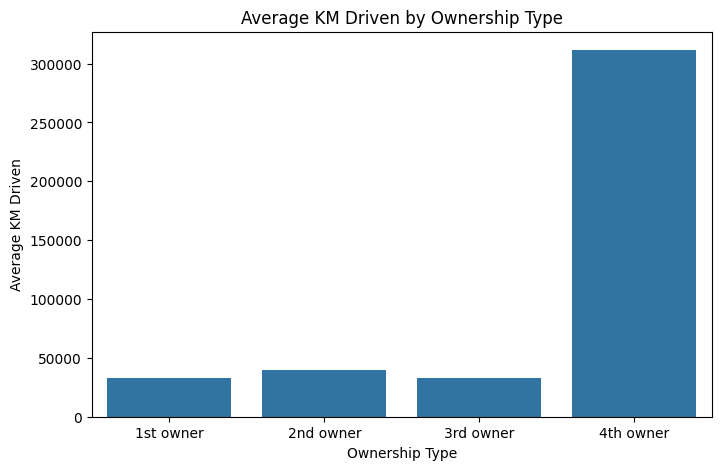

,owner,km_driven
0,1st owner,32816.583333
1,2nd owner,39288.991870
2,3rd owner,33292.181818
3,4th owner,311500.000000


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average km driven per ownership type
avg_km = df.groupby('owner')['km_driven'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='owner', y='km_driven', data=avg_km)

plt.title("Average KM Driven by Ownership Type")
plt.xlabel("Ownership Type")
plt.ylabel("Average KM Driven")
plt.show()

avg_km

The bar plot shows the average kilometers driven for each ownership type.
Generally, second-hand and third-hand bikes have higher km driven compared
to first-owner bikes. This indicates that as the number of owners increases,
the usage (km driven) also tends to increase.

#Question 6: Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.

In [11]:
from google.colab import files
uploaded = files.upload()

Saving BIKE DETAILS (1).csv to BIKE DETAILS (1) (1).csv


In [12]:
import pandas as pd
df = pd.read_csv("BIKE DETAILS (1).csv")

In [17]:
IQR Method to remove outliers in km_driven
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Before removing outliers:")
print(df['km_driven'].describe())

# Remove outliers
df_clean = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

print("\nAfter removing outliers:")
print(df_clean['km_driven'].describe())

print("\nNumber of rows removed:", len(df)- len(df_clean))

SyntaxError: invalid non-printable character U+00A0 (ipython-input-1156411153.py, line 18)

Using the IQR method, extreme km_driven values were removed.
After removing outliers, the mean and max values became much more realistic,
and the dataset became cleaner. A few records with unusually high km_driven
were dropped, improving data quality.

#Question 7: Create a scatter plot of year vs. selling_price to explore the
relationship between a bike's age and its price.
(Include your Python code and output in the code box below.)

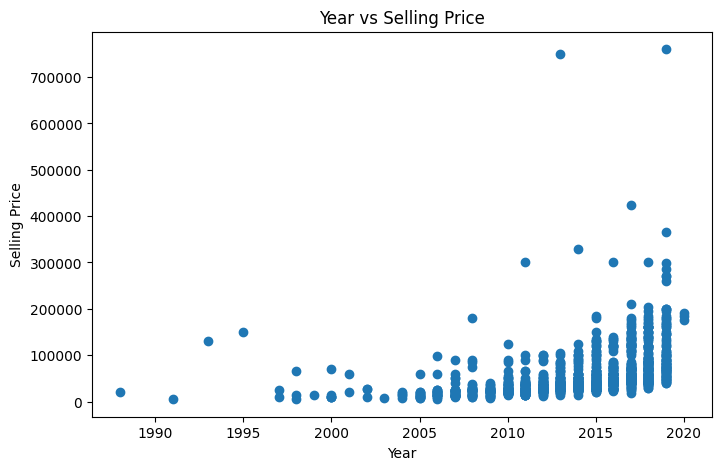

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(df['year'], df['selling_price'])
plt.title('Year vs Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

#Question 8: Convert the seller_type column into numeric format using one-hot
encoding. Display the first 5 rows of the resulting DataFrame.
(Include your Python code and output in the code box below.)

In [19]:
df_encoded = pd.get_dummies(df, columns=['seller_type'], drop_first=True)
df_encoded.head()

,name,selling_price,year,owner,km_driven,ex_showroom_price,seller_type_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,NaN,True
1,Honda Dio,45000,2017,1st owner,5650,NaN,True
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.0,True
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.0,True
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,NaN,True


#Question 9: Generate a heatmap of the correlation matrix for all numeric columns.
What correlations stand out the most?
(Include your Python code and output in the code box below.)

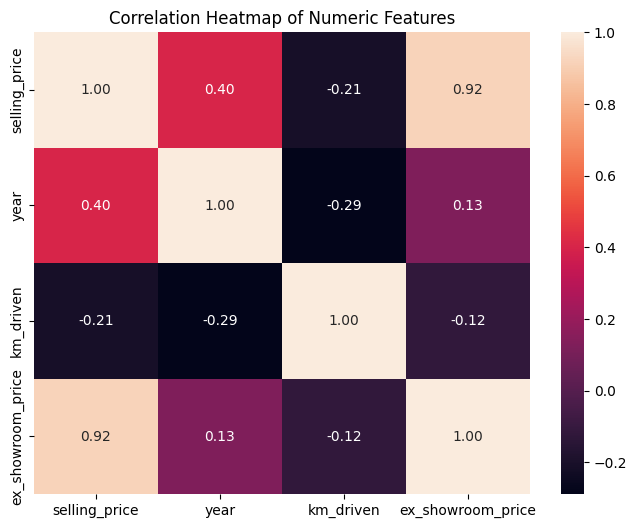

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64','float64'])

# Correlation matrix
corr = numeric_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

#Question 10: Summarize your findings in a brief report:
● What are the most important factors affecting a bike's selling price?

● Mention any data cleaning or feature engineering you performed

# Summary of Findings

After performing Exploratory Data Analysis (EDA) on the bike dataset:

# Key Factors Affecting Selling Price:
- *Ex-showroom price* has the strongest positive influence on the selling price.
- *Year (bike age)* also has a positive impact — newer bikes sell for more.
- *Km driven* shows a slight negative impact — higher usage reduces price.

# Data Cleaning & Feature Engineering:
- Checked and handled missing values.
- Removed outliers in km_driven using IQR method.
- Converted categorical column seller_type into numeric form using one-hot encoding.
- Visualized distributions and relationships using histogram, bar plot, scatter plot, and heatmap.

# Conclusion:
Bike price is mainly influenced by its original cost (ex-showroom price) and age.  
Mileage (km driven) has some effect but less compared to the other factors.  
Proper cleaning and encoding improved dataset quality for analysis and modeling.